In [1]:
pip install uwg

Note: you may need to restart the kernel to use updated packages.


In [2]:
from uwg import UWG


In [3]:
# Add inputs

# Input 1 - Blue Graph

model_inputs1 = [
    {'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
     'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}
]

# Input 2 - Orange Graph

model_inputs2 = [{'bldheight': 30, 'blddensity': 0.8, 'vertohor': 0.9, 'grasscover': 0.1, 'treecover': 0.09, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]

# Input 3 - Green Graph

model_inputs3 = [{'bldheight': 30, 'blddensity': 0.65, 'vertohor': 0.9, 'grasscover': 0.18, 'treecover': 0.15, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.7}]

# charlength = length of area (one side of square) in m. Badgerys Creek covers an area of about 27km2
# h_mix = HVAC waste heat released into street canyon.
# albroad = albedo of roads
# zone = ASHRAE weather zone of area. Badgerys Creek is Zone 2A (Temperate)

EPW data for January 2010 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan1.epw
Simulating new temperature and humidity values for 

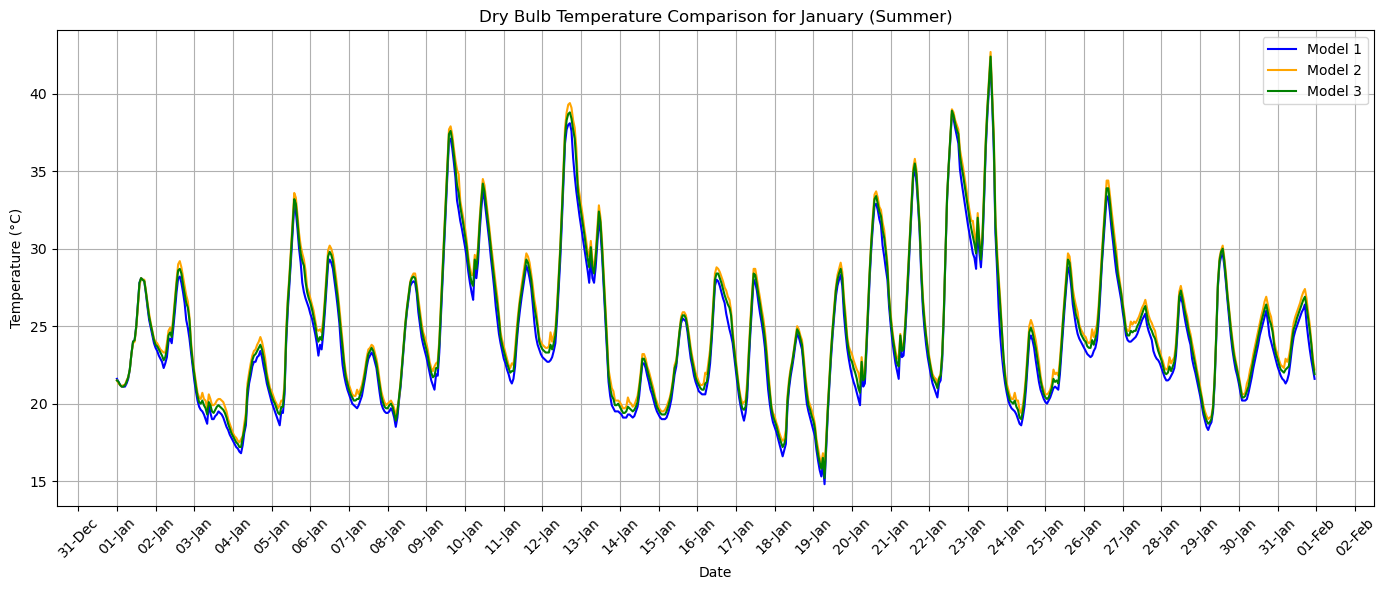

In [8]:
import os
import matplotlib.pyplot as plt
from uwg import UWG
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Path to the EPW file
epw_path = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2007-2021.epw"

# Define your model input configurations
model_inputs1 = [{'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}]

model_inputs2 = [{'bldheight': 30, 'blddensity': 0.8, 'vertohor': 0.9, 'grasscover': 0.1, 'treecover': 0.09, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]

model_inputs3 = [{'bldheight': 30, 'blddensity': 0.65, 'vertohor': 0.9, 'grasscover': 0.18, 'treecover': 0.15, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.7}]

def filter_epw_file_for_january(original_file, new_file, target_year=2010):
    """Filter an EPW file to retain only the data for January of a specific year."""
    with open(original_file, 'r') as infile:
        lines = infile.readlines()

    # Extract the header
    header = lines[:8]

    # Extract the data
    data_lines = lines[8:]

    january_data = [line for line in data_lines if int(line.split(',')[0]) == target_year and int(line.split(',')[1]) == 1]  # filter for January
    
    new_lines = header + january_data
    
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)

    print(f"EPW data for January {target_year} saved to: {new_file}")

def run_uwg_model(epw_path, model_input, output_path):
    """Run the UWG model with given parameters and EPW path."""
    model = UWG.from_param_args(
        epw_path=epw_path,
        bldheight=model_input['bldheight'],
        blddensity=model_input['blddensity'],
        vertohor=model_input['vertohor'],
        grasscover=model_input['grasscover'],
        treecover=model_input['treecover'],
        zone=model_input['zone'],
        charlength=model_input['charlength'],
        h_mix=model_input['h_mix'],
        albroad=model_input['albroad']
    )
    model.generate()
    model.simulate()
    model.write_epw()

    # Handle file renaming
    default_output_path = epw_path.replace(".epw", "_UWG.epw")
    if os.path.exists(output_path):
        os.remove(output_path)
    os.rename(default_output_path, output_path)

    print(f"Modified EPW saved to: {output_path}")
    return model

def extract_dry_bulb_from_epw(epw_file_path):
    """Extract dry bulb temperature from an EPW file."""
    with open(epw_file_path, 'r') as file:
        lines = file.readlines()
    return [float(line.split(',')[6]) for line in lines[8:]]

def plot_dry_bulb_temperature(dbt1, dbt2, dbt3):
    """Plot dry bulb temperatures from three model outputs."""
    time_axis = [datetime(2010, 1, 1, 0, 0) + timedelta(hours=i) for i in range(len(dbt1))]
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, dbt1, label='Model 1', color='blue')
    plt.plot(time_axis, dbt2, label='Model 2', color='orange')
    plt.plot(time_axis, dbt3, label='Model 3', color='green')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Dry Bulb Temperature Comparison for January (Summer)')
    plt.legend()
    plt.grid(True)

    # Adjust date format and tick locations
    ax = plt.gca()  # get the current axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # use day and abbreviated month
    ax.xaxis.set_major_locator(mdates.DayLocator())  # place a tick for each day

    plt.xticks(rotation=45)  # Rotate date labels

    plt.tight_layout()
    plt.show()

filtered_epw_path1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January.epw"

# Filter EPW for January 2010 data
filter_epw_file_for_january(epw_path, filtered_epw_path1, 2010)  
 
# Specify the output paths
model_output_path_jan1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan1.epw"
model_output_path_jan2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan2.epw"
model_output_path_jan3 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan3.epw"


# Running UWG models
run_uwg_model(filtered_epw_path1, model_inputs1[0], model_output_path_jan1)
run_uwg_model(filtered_epw_path1, model_inputs2[0], model_output_path_jan2)
run_uwg_model(filtered_epw_path1, model_inputs3[0], model_output_path_jan3)


# Extracting dry bulb temperatures
model_output_jan1_dbt = extract_dry_bulb_from_epw(model_output_path_jan1)
model_output_jan2_dbt = extract_dry_bulb_from_epw(model_output_path_jan2)
model_output_jan3_dbt = extract_dry_bulb_from_epw(model_output_path_jan3)


# Plotting
plot_dry_bulb_temperature(model_output_jan1_dbt, model_output_jan2_dbt, model_output_jan3_dbt)

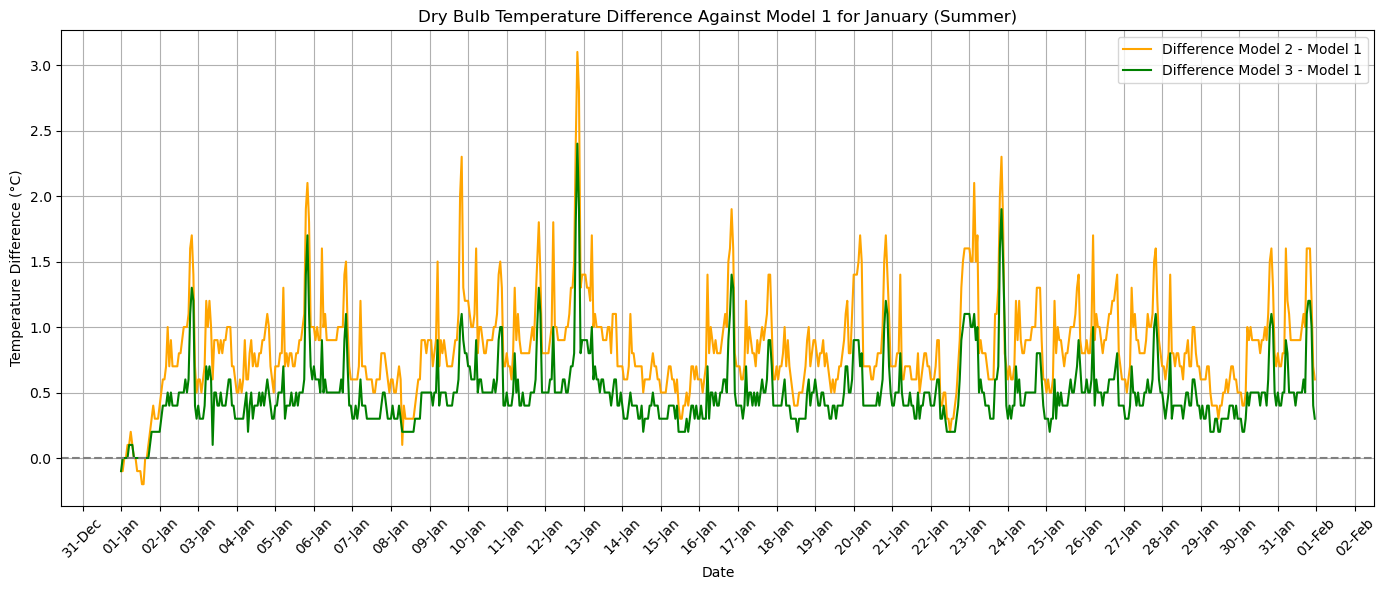

In [9]:
def plot_temperature_differences(dbt1, dbt2, dbt3):
    """Plot temperature differences of Model 2 and Model 3 against Model 1."""
    time_axis = [datetime(2010, 1, 1, 0, 0) + timedelta(hours=i) for i in range(len(dbt1))]

    # Calculate the differences
    diff_dbt2 = [t2 - t1 for t1, t2 in zip(dbt1, dbt2)]
    diff_dbt3 = [t3 - t1 for t1, t3 in zip(dbt1, dbt3)]

    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, diff_dbt2, label='Difference Model 2 - Model 1', color='orange')
    plt.plot(time_axis, diff_dbt3, label='Difference Model 3 - Model 1', color='green')
    
    plt.axhline(0, color='grey', linestyle='--')  # Reference line for zero difference
    
    plt.xlabel('Date')
    plt.ylabel('Temperature Difference (°C)')
    plt.title('Dry Bulb Temperature Difference Against Model 1 for January (Summer)')
    plt.legend()
    plt.grid(True)

    # Adjust date format and tick locations
    ax = plt.gca()  # get the current axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # use day and abbreviated month
    ax.xaxis.set_major_locator(mdates.DayLocator())  # place a tick for each day

    plt.xticks(rotation=45)  # Rotate the date labels for better visibility
    plt.tight_layout()
    plt.show()

# Modify the last line of your script:
plot_temperature_differences(model_output_jan1_dbt, model_output_jan2_dbt, model_output_jan3_dbt)


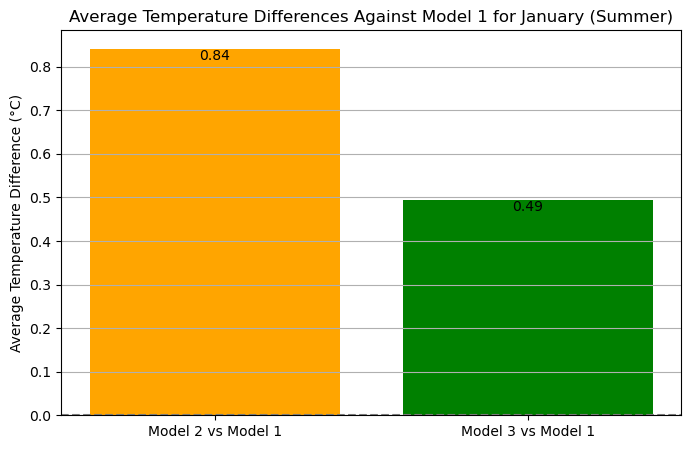

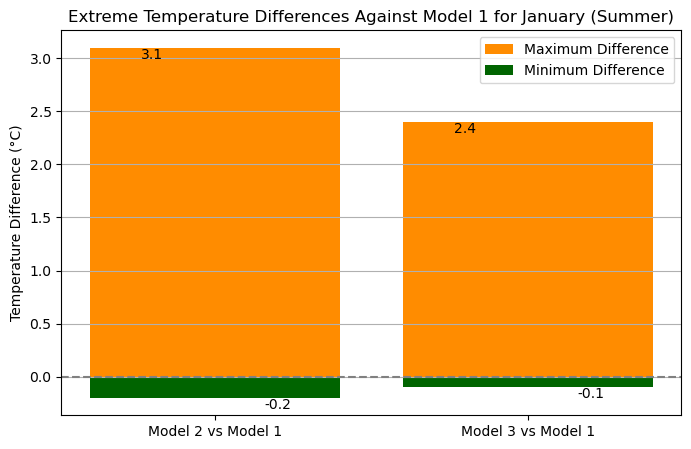

In [11]:
def plot_average_differences(diff_dbt2, diff_dbt3):
    """Plot average temperature differences of Model 2 and Model 3 against Model 1."""
    avg_diff2 = sum(diff_dbt2) / len(diff_dbt2)
    avg_diff3 = sum(diff_dbt3) / len(diff_dbt3)
    
    models = ["Model 2 vs Model 1", "Model 3 vs Model 1"]
    avg_diffs = [avg_diff2, avg_diff3]
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, avg_diffs, color=['orange', 'green'])
    plt.axhline(0, color='grey', linestyle='--')  # Reference line for zero difference
    plt.ylabel('Average Temperature Difference (°C)')
    plt.title('Average Temperature Differences Against Model 1 for January (Summer)')
    plt.grid(True, which='both', axis='y')

    # Annotate bars with their values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom' if yval < 0 else 'top')
    
    plt.show()

def plot_extreme_differences(diff_dbt2, diff_dbt3):
    """Plot the most extreme temperature differences of Model 2 and Model 3 against Model 1."""
    max_diff2, min_diff2 = max(diff_dbt2), min(diff_dbt2)
    max_diff3, min_diff3 = max(diff_dbt3), min(diff_dbt3)
    
    models = ["Model 2 vs Model 1", "Model 3 vs Model 1"]
    
    plt.figure(figsize=(8, 5))
    bars_max = plt.bar(models, [max_diff2, max_diff3], label='Maximum Difference', color='darkorange')
    bars_min = plt.bar(models, [min_diff2, min_diff3], label='Minimum Difference', color='darkgreen')
    plt.axhline(0, color='grey', linestyle='--')  # Reference line for zero difference
    plt.ylabel('Temperature Difference (°C)')
    plt.title('Extreme Temperature Differences Against Model 1 for January (Summer)')
    plt.legend()
    plt.grid(True, which='both', axis='y')

    # Annotate bars with their values
    for bar in bars_max:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/4, yval, round(yval, 2), ha='center', va='bottom' if yval < 0 else 'top')
    for bar in bars_min:
        yval = bar.get_height()
        plt.text(bar.get_x() + 3*bar.get_width()/4, yval, round(yval, 2), ha='center', va='top' if yval < 0 else 'bottom')
    
    plt.show()

# Calculate the temperature differences
diff_dbt2, diff_dbt3 = calculate_differences(model_output_jan1_dbt, model_output_jan2_dbt, model_output_jan3_dbt)

# Plot the average temperature differences
plot_average_differences(diff_dbt2, diff_dbt3)

# Plot the most extreme temperature deviations
plot_extreme_differences(diff_dbt2, diff_dbt3)


EPW data for 2021 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simul

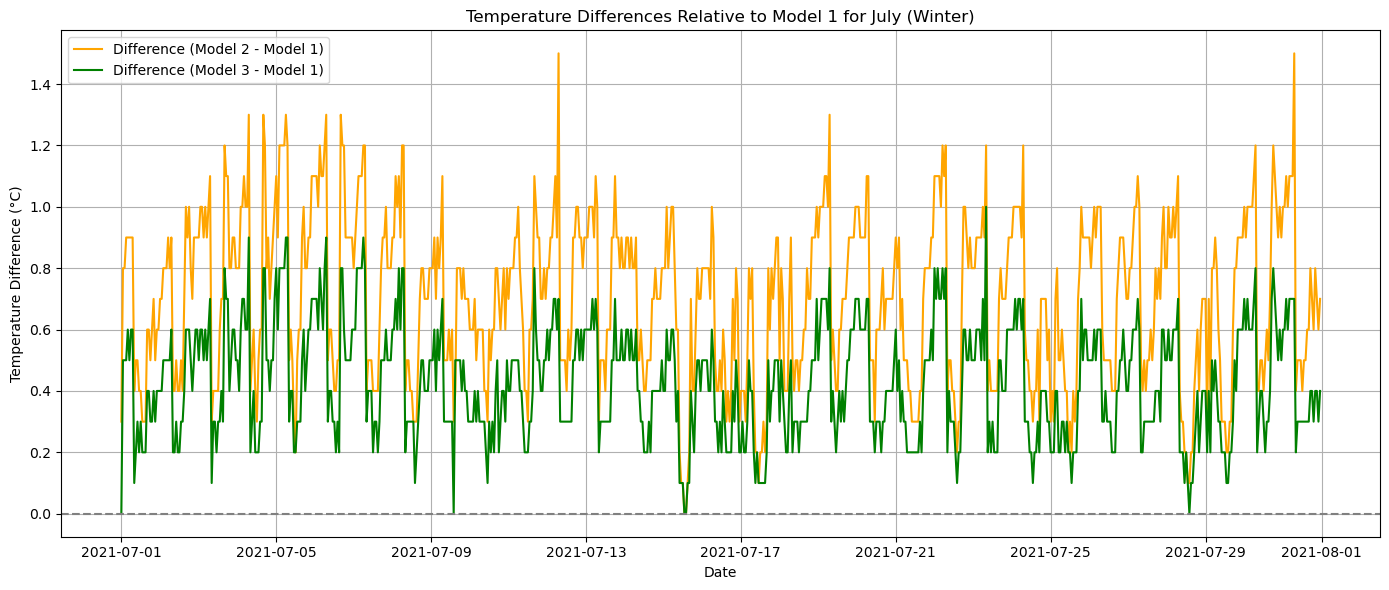

In [13]:
import os
from uwg import UWG
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def filter_epw_file_for_year(original_file, new_file, target_year=2021):
    """Filter an EPW file to retain only the data for a specific year."""
    with open(original_file, 'r') as infile:
        lines = infile.readlines()

    # Extract the header
    header = lines[:8]

    # Extract the data
    data_lines = lines[8:]
    
    year_data = [line for line in data_lines if int(line.split(',')[0]) == target_year]
    
    new_lines = header + year_data
    
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)

    print(f"EPW data for {target_year} saved to: {new_file}")
    
# Define your model input configurations
model_inputs1 = [{'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}]

model_inputs2 = [{'bldheight': 30, 'blddensity': 0.8, 'vertohor': 0.9, 'grasscover': 0.1, 'treecover': 0.09, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]

model_inputs3 = [{'bldheight': 30, 'blddensity': 0.65, 'vertohor': 0.9, 'grasscover': 0.18, 'treecover': 0.15, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.7}]

def run_uwg_model(epw_path, model_input, output_path):
    """Run the UWG model with given parameters and EPW path."""
    model = UWG.from_param_args(
        epw_path=epw_path,
        bldheight=model_input['bldheight'],
        blddensity=model_input['blddensity'],
        vertohor=model_input['vertohor'],
        grasscover=model_input['grasscover'],
        treecover=model_input['treecover'],
        zone=model_input['zone'],
        charlength=model_input['charlength'],
        h_mix=model_input['h_mix'],
        albroad=model_input['albroad']
    )
    model.generate()
    model.simulate()
    model.write_epw()
    
    # Move the output EPW to the desired location
    default_output_path = epw_path.replace(".epw", "_UWG.epw")
    if os.path.exists(output_path):
        os.remove(output_path)
    os.rename(default_output_path, output_path)
    
    print(f"Modified EPW saved to: {output_path}")
    return model

def extract_dry_bulb_from_epw(epw_file_path):
    """Extract dry bulb temperatures from EPW file."""
    with open(epw_file_path, 'r') as file:
        lines = file.readlines()

    # Skipping the header
    data_lines = lines[8:]

    # Extracting the dry bulb temperature (field index 6 in EPW format)
    dry_bulb_temp = [float(line.split(',')[6]) for line in data_lines]
    return dry_bulb_temp

def plot_temperature_differences(dbt1, dbt2, dbt3):
    """Plot temperature differences of Models 2 and 3 from Model 1."""
    time_axis = [datetime(2021, 7, 1, 0, 0) + timedelta(hours=i) for i in range(len(dbt1))]
    
    # Calculate the differences
    difference_dbt2 = [temp2 - temp1 for temp1, temp2 in zip(dbt1, dbt2)]
    difference_dbt3 = [temp3 - temp1 for temp1, temp3 in zip(dbt1, dbt3)]
    
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, difference_dbt2, label='Difference (Model 2 - Model 1)', color='orange')
    plt.plot(time_axis, difference_dbt3, label='Difference (Model 3 - Model 1)', color='green')
    plt.axhline(0, color='grey', linestyle='--')  # Line indicating zero difference
    plt.xlabel('Date')
    plt.ylabel('Temperature Difference (°C)')
    plt.title('Temperature Differences Relative to Model 1 for July (Winter)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_epw_path = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021.epw"

# Filter EPW for 2021 data
filter_epw_file_for_year(epw_path, filtered_epw_path, 2021)

# Specify the output paths
model_output_path_july1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1.epw"
model_output_path_july2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July2.epw"
model_output_path_july3 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July3.epw"

# Running UWG models
run_uwg_model(filtered_epw_path, model_inputs1[0], model_output_path_july1)
run_uwg_model(filtered_epw_path, model_inputs2[0], model_output_path_july2)
run_uwg_model(filtered_epw_path, model_inputs3[0], model_output_path_july3)

# Extracting dry bulb temperatures for July (Winter)
model_output_july1_dbt = extract_dry_bulb_from_epw(model_output_path_july1)[0:744]  # For 31 days of July
model_output_july2_dbt = extract_dry_bulb_from_epw(model_output_path_july2)[0:744]  # For 31 days of July
model_output_july3_dbt = extract_dry_bulb_from_epw(model_output_path_july3)[0:744]  # For 31 days of July

# Plotting
plot_temperature_differences(model_output_july1_dbt, model_output_july2_dbt, model_output_july3_dbt)

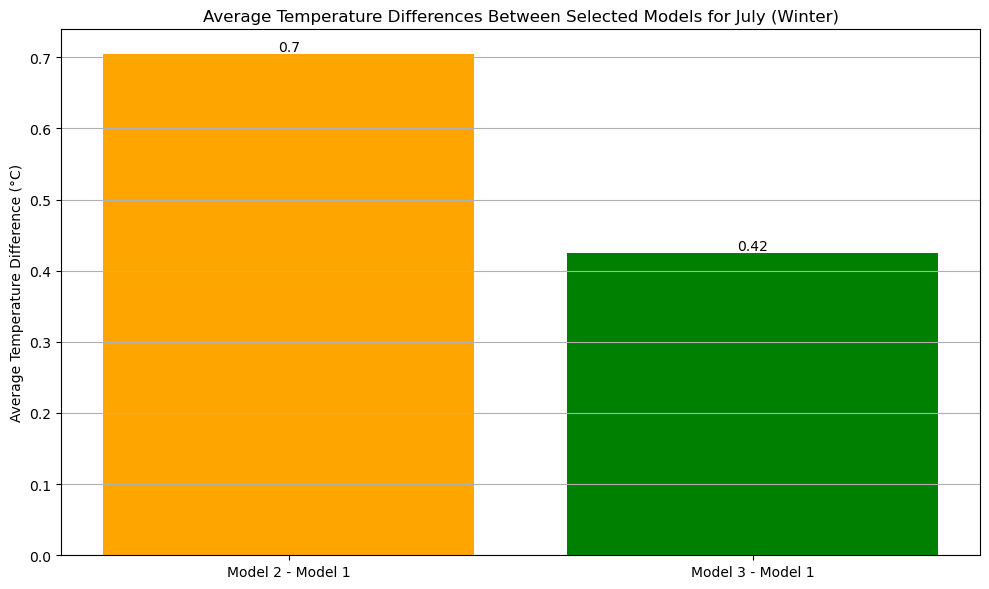

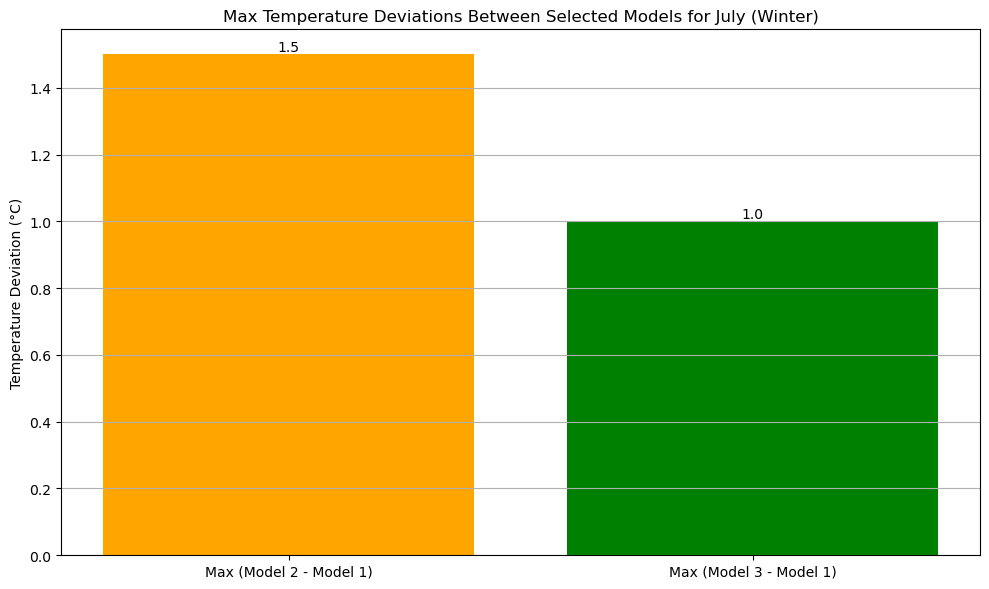

In [15]:
def plot_average_temperature_difference(dbt1, dbt2, dbt3):
    """Plot average temperature differences between selected model pairs."""
    avg_diff_2_1 = sum([temp2 - temp1 for temp1, temp2 in zip(dbt1, dbt2)]) / len(dbt1)
    avg_diff_3_1 = sum([temp3 - temp1 for temp1, temp3 in zip(dbt1, dbt3)]) / len(dbt1)
    
    differences = [avg_diff_2_1, avg_diff_3_1]
    labels = ['Model 2 - Model 1', 'Model 3 - Model 1']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, differences, color=['orange', 'green'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                 ha='center', va='bottom', fontsize=10)

    plt.ylabel('Average Temperature Difference (°C)')
    plt.title('Average Temperature Differences Between Selected Models for July (Winter)')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

def plot_max_temperature_deviation(dbt1, dbt2, dbt3):
    """Plot maximum temperature deviations between selected model pairs."""
    max_diff_2_1 = max([temp2 - temp1 for temp1, temp2 in zip(dbt1, dbt2)])
    max_diff_3_1 = max([temp3 - temp1 for temp1, temp3 in zip(dbt1, dbt3)])
    
    differences = [max_diff_2_1, max_diff_3_1]
    labels = ['Max (Model 2 - Model 1)', 'Max (Model 3 - Model 1)']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, differences, color=['orange', 'green'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                 ha='center', va='bottom', fontsize=10)

    plt.ylabel('Temperature Deviation (°C)')
    plt.title('Max Temperature Deviations Between Selected Models for July (Winter)')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

# Plotting
plot_average_temperature_difference(model_output_july1_dbt, model_output_july2_dbt, model_output_july3_dbt)
plot_max_temperature_deviation(model_output_july1_dbt, model_output_july2_dbt, model_output_july3_dbt)

EPW data for January 2010 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January_Humid.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January_Humid_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan1_Humid.epw
Simulating new temperature and hu

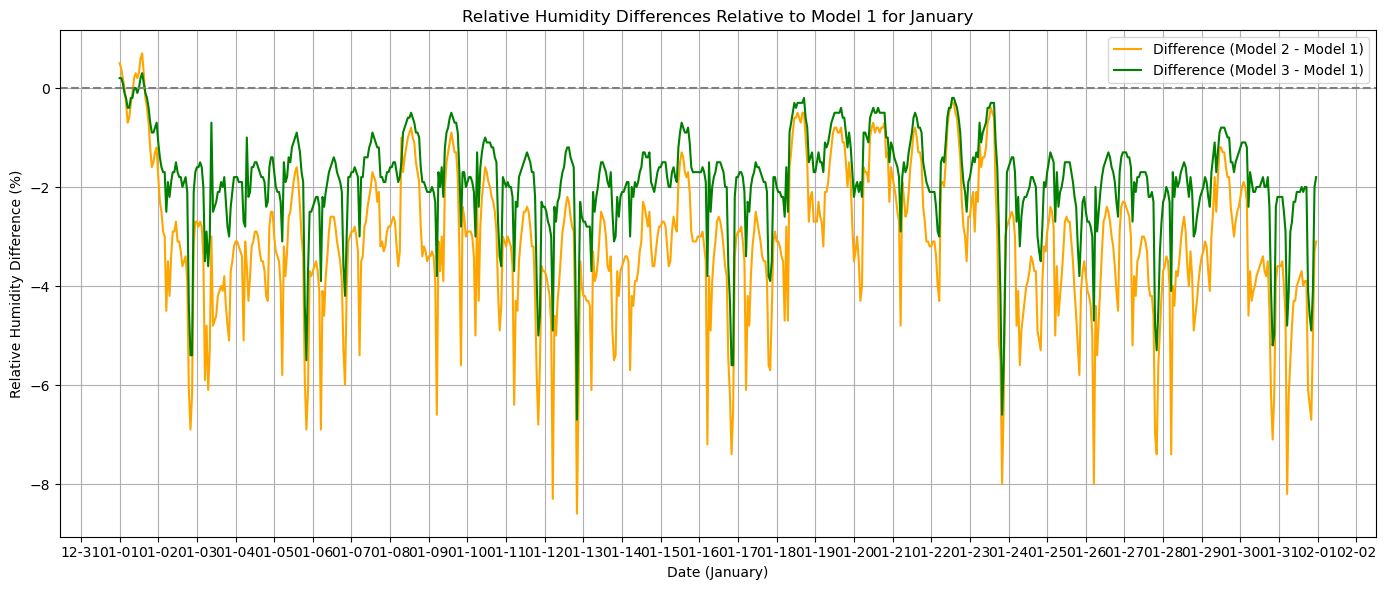

In [22]:
import os
import matplotlib.pyplot as plt
from uwg import UWG
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter, DayLocator


epw_path = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2007-2021.epw"

def filter_epw_file_for_january(original_file, new_file, target_year=2010):
    """Filter an EPW file to retain only the data for January of a specific year."""
    with open(original_file, 'r') as infile:
        lines = infile.readlines()

    # Extract the header
    header = lines[:8]

    # Extract the data
    data_lines = lines[8:]

    january_data = [line for line in data_lines if int(line.split(',')[0]) == target_year and int(line.split(',')[1]) == 1]  # filter for January
    
    new_lines = header + january_data
    
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)

    print(f"EPW data for January {target_year} saved to: {new_file}")

def run_uwg_model(epw_path, model_input, output_path):
    """Run the UWG model with given parameters and EPW path."""
    model = UWG.from_param_args(
        epw_path=epw_path,
        bldheight=model_input['bldheight'],
        blddensity=model_input['blddensity'],
        vertohor=model_input['vertohor'],
        grasscover=model_input['grasscover'],
        treecover=model_input['treecover'],
        zone=model_input['zone'],
        charlength=model_input['charlength'],
        h_mix=model_input['h_mix'],
        albroad=model_input['albroad']
    )
    model.generate()
    model.simulate()
    model.write_epw()

    # Handle file renaming
    default_output_path = epw_path.replace(".epw", "_UWG.epw")
    if os.path.exists(output_path):
        os.remove(output_path)
    os.rename(default_output_path, output_path)

    print(f"Modified EPW saved to: {output_path}")
    return model

def extract_relative_humidity_from_epw(epw_file_path):
    """Extract relative humidity from an EPW file."""
    with open(epw_file_path, 'r') as file:
        lines = file.readlines()
    return [float(line.split(',')[8]) for line in lines[8:]]


def plot_relative_humidity_differences(rh1, rh2, rh3):
    """Plot relative humidity differences of Models 2 and 3 from Model 1."""
    time_axis = [datetime(2010, 1, 1, 0, 0) + timedelta(hours=i) for i in range(len(rh1))]

    # Calculate the differences
    difference_rh2 = [humidity2 - humidity1 for humidity1, humidity2 in zip(rh1, rh2)]
    difference_rh3 = [humidity3 - humidity1 for humidity1, humidity3 in zip(rh1, rh3)]
    
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, difference_rh2, label='Difference (Model 2 - Model 1)', color='orange')
    plt.plot(time_axis, difference_rh3, label='Difference (Model 3 - Model 1)', color='green')
    plt.axhline(0, color='grey', linestyle='--')  # Line indicating zero difference
    plt.xlabel('Date (January)')
    plt.ylabel('Relative Humidity Difference (%)')
    plt.title('Relative Humidity Differences Relative to Model 1 for January')

    # Setting the x-axis format
    ax = plt.gca()
    ax.xaxis.set_major_locator(DayLocator(interval=1))  # Setting x-axis ticks to show every day
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d')) # Only display month and day

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_epw_path_jan = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2010_January_Humid.epw"

# Filter EPW for January 2010 data
filter_epw_file_for_january(epw_path, filtered_epw_path_jan, 2010)

# Specify the output paths
model_output_path_jan1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan1_Humid.epw"
model_output_path_jan2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan2_Humid.epw"
model_output_path_jan3 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_Jan3_Humid.epw"

# Running UWG models
run_uwg_model(filtered_epw_path_jan, model_inputs1[0], model_output_path_jan1)
run_uwg_model(filtered_epw_path_jan, model_inputs2[0], model_output_path_jan2)
run_uwg_model(filtered_epw_path_jan, model_inputs3[0], model_output_path_jan3)

# Extracting relative humidity for January
model_output_jan1_rh = extract_relative_humidity_from_epw(model_output_path_jan1)
model_output_jan2_rh = extract_relative_humidity_from_epw(model_output_path_jan2)
model_output_jan3_rh = extract_relative_humidity_from_epw(model_output_path_jan3)

# Plotting
plot_relative_humidity_differences(model_output_jan1_rh, model_output_jan2_rh, model_output_jan3_rh)



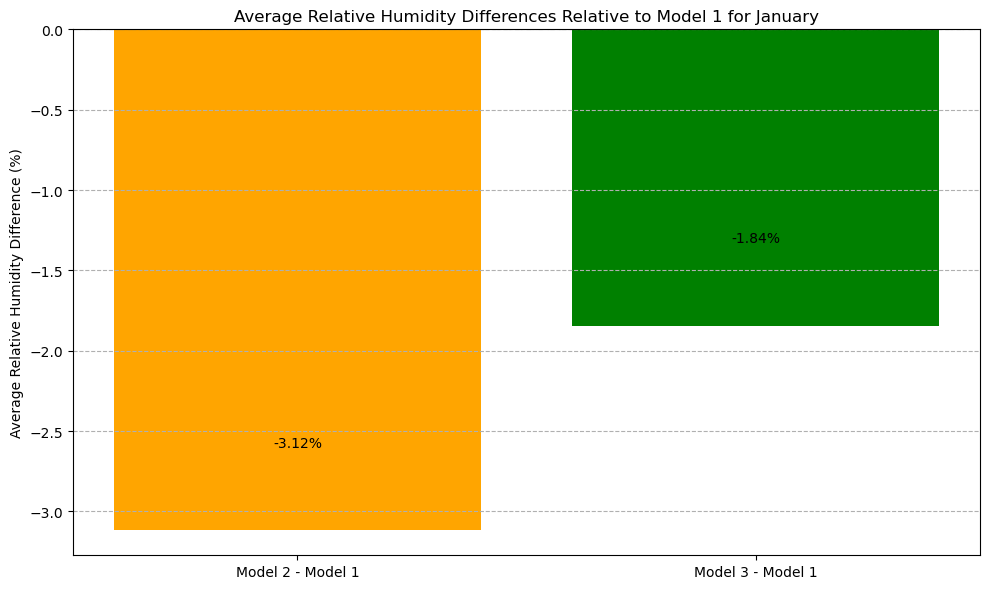

In [24]:
def compute_average_difference(rh1, rh2, rh3):
    """Compute the average relative humidity difference."""
    difference_rh2 = [humidity2 - humidity1 for humidity1, humidity2 in zip(rh1, rh2)]
    difference_rh3 = [humidity3 - humidity1 for humidity1, humidity3 in zip(rh1, rh3)]
    return sum(difference_rh2) / len(difference_rh2), sum(difference_rh3) / len(difference_rh3)

def plot_average_difference(rh1, rh2, rh3):
    """Plot the average relative humidity differences."""
    avg_diff_rh2, avg_diff_rh3 = compute_average_difference(rh1, rh2, rh3)
    
    models = ["Model 2 - Model 1", "Model 3 - Model 1"]
    avg_differences = [avg_diff_rh2, avg_diff_rh3]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, avg_differences, color=['orange', 'green'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)
    
    plt.axhline(0, color='grey', linestyle='--')  # Line indicating zero difference
    plt.ylabel('Average Relative Humidity Difference (%)')
    plt.title('Average Relative Humidity Differences Relative to Model 1 for January')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

# Plotting the average differences
plot_average_difference(model_output_jan1_rh, model_output_jan2_rh, model_output_jan3_rh)


EPW data for July 2021 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_July_Humid.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_July_Humid_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1_Humid.epw
Simulating new temperature and humidity v

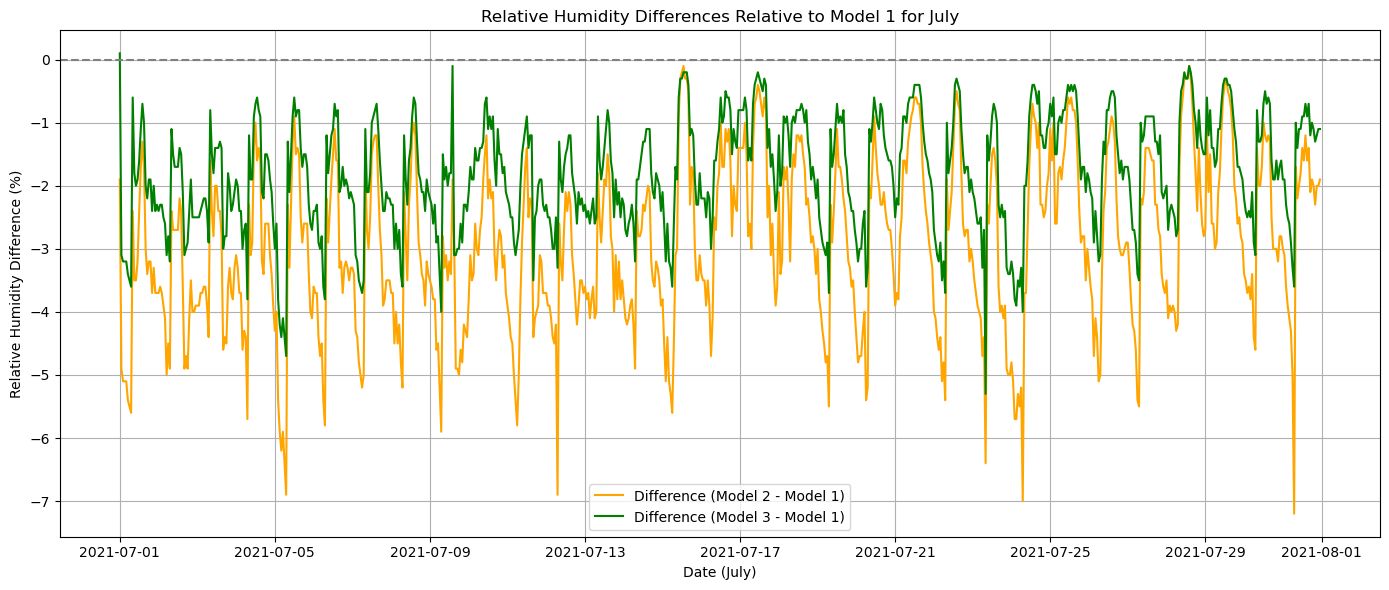

In [25]:
import os
from uwg import UWG
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def filter_epw_file_for_july(original_file, new_file, target_year=2021):
    with open(original_file, 'r') as infile:
        lines = infile.readlines()
    header = lines[:8]
    data_lines = lines[8:]
    july_data = [line for line in data_lines if int(line.split(',')[0]) == target_year and int(line.split(',')[1]) == 7]
    new_lines = header + july_data
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)
    print(f"EPW data for July {target_year} saved to: {new_file}")

model_inputs1 = [{'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}]
model_inputs2 = [{'bldheight': 30, 'blddensity': 0.8, 'vertohor': 0.9, 'grasscover': 0.1, 'treecover': 0.09, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]
model_inputs3 = [{'bldheight': 30, 'blddensity': 0.65, 'vertohor': 0.9, 'grasscover': 0.18, 'treecover': 0.15, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.7}]

def plot_relative_humidity_differences(rh1, rh2, rh3):
    time_axis = [datetime(2021, 7, 1, 0, 0) + timedelta(hours=i) for i in range(len(rh1))]
    difference_rh2 = [humidity2 - humidity1 for humidity1, humidity2 in zip(rh1, rh2)]
    difference_rh3 = [humidity3 - humidity1 for humidity1, humidity3 in zip(rh1, rh3)]
    plt.figure(figsize=(14, 6))
    plt.plot(time_axis, difference_rh2, label='Difference (Model 2 - Model 1)', color='orange')
    plt.plot(time_axis, difference_rh3, label='Difference (Model 3 - Model 1)', color='green')
    plt.axhline(0, color='grey', linestyle='--')
    plt.xlabel('Date (July)')
    plt.ylabel('Relative Humidity Difference (%)')
    plt.title('Relative Humidity Differences Relative to Model 1 for July')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

filtered_epw_path_july = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_July_Humid.epw"
filter_epw_file_for_july(epw_path, filtered_epw_path_july, 2021)

model_output_path_july1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1_Humid.epw"
model_output_path_july2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July2_Humid.epw"
model_output_path_july3 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July3_Humid.epw"

run_uwg_model(filtered_epw_path_july, model_inputs1[0], model_output_path_july1)
run_uwg_model(filtered_epw_path_july, model_inputs2[0], model_output_path_july2)
run_uwg_model(filtered_epw_path_july, model_inputs3[0], model_output_path_july3)

model_output_july1_rh = extract_relative_humidity_from_epw(model_output_path_july1)
model_output_july2_rh = extract_relative_humidity_from_epw(model_output_path_july2)
model_output_july3_rh = extract_relative_humidity_from_epw(model_output_path_july3)

plot_relative_humidity_differences(model_output_july1_rh, model_output_july2_rh, model_output_july3_rh)


EPW data for July 2021 saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_July_Humid.epw
Simulating new temperature and humidity values for 31 days from 1/1.
Simulating Day 1
Simulating Day 2
Simulating Day 3
Simulating Day 4
Simulating Day 5
Simulating Day 6
Simulating Day 7
Simulating Day 8
Simulating Day 9
Simulating Day 10
Simulating Day 11
Simulating Day 12
Simulating Day 13
Simulating Day 14
Simulating Day 15
Simulating Day 16
Simulating Day 17
Simulating Day 18
Simulating Day 19
Simulating Day 20
Simulating Day 21
Simulating Day 22
Simulating Day 23
Simulating Day 24
Simulating Day 25
Simulating Day 26
Simulating Day 27
Simulating Day 28
Simulating Day 29
Simulating Day 30
Simulating Day 31
New climate file is generated at C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_July_Humid_UWG.epw.
Modified EPW saved to: C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1_Humid.epw
Simulating new temperature and humidity v

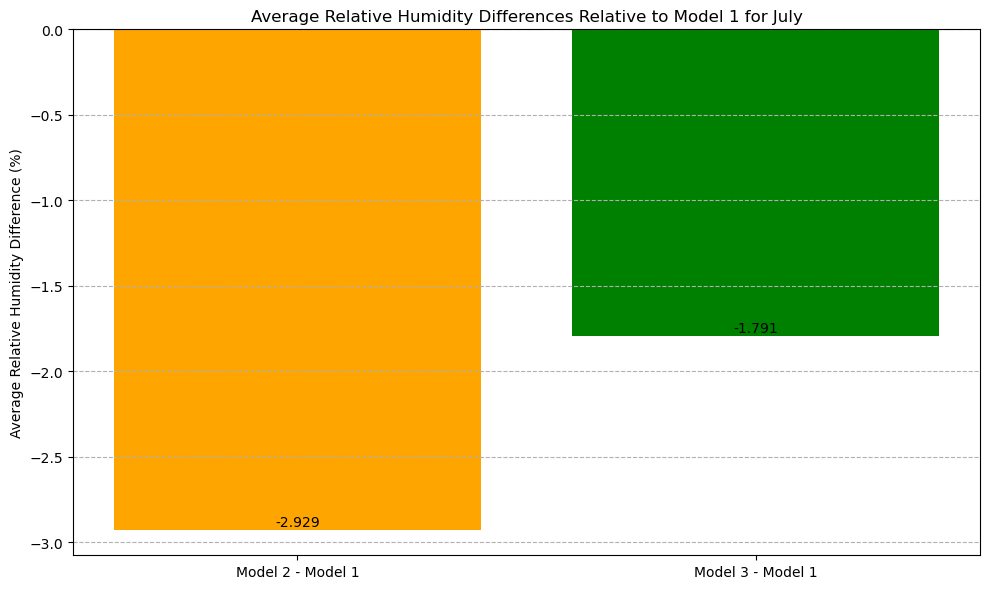

In [27]:
import os
from uwg import UWG
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def filter_epw_file_for_july(original_file, new_file, target_year=2021):
    with open(original_file, 'r') as infile:
        lines = infile.readlines()
    header = lines[:8]
    data_lines = lines[8:]
    july_data = [line for line in data_lines if int(line.split(',')[0]) == target_year and int(line.split(',')[1]) == 7]
    new_lines = header + july_data
    with open(new_file, 'w') as outfile:
        outfile.writelines(new_lines)
    print(f"EPW data for July {target_year} saved to: {new_file}")

model_inputs1 = [{'bldheight': 3, 'blddensity': 0.05, 'vertohor': 0.2, 'grasscover': 0.7, 'treecover': 0.2, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.1, 'albroad': 0.5}]
model_inputs2 = [{'bldheight': 30, 'blddensity': 0.8, 'vertohor': 0.9, 'grasscover': 0.1, 'treecover': 0.09, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.1}]
model_inputs3 = [{'bldheight': 30, 'blddensity': 0.65, 'vertohor': 0.9, 'grasscover': 0.18, 'treecover': 0.15, 'zone': '2A',
                  'charlength': 1080, 'h_mix': 0.8, 'albroad': 0.7}]

def average_relative_humidity_difference(rh1, rh2, rh3):
    """Calculate and plot the average relative humidity difference for each model relative to Model 1."""
    average_difference_rh2 = sum([humidity2 - humidity1 for humidity1, humidity2 in zip(rh1, rh2)]) / len(rh1)
    average_difference_rh3 = sum([humidity3 - humidity1 for humidity1, humidity3 in zip(rh1, rh3)]) / len(rh1)

    labels = ['Model 2 - Model 1', 'Model 3 - Model 1']
    averages = [average_difference_rh2, average_difference_rh3]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, averages, color=['orange', 'green'])
    plt.axhline(0, color='grey', linestyle='--')
    plt.ylabel('Average Relative Humidity Difference (%)')
    plt.title('Average Relative Humidity Differences Relative to Model 1 for July')
    plt.grid(axis='y', linestyle='--')
    
    # Add specific value on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

filtered_epw_path_july = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys Creek 2021_July_Humid.epw"
filter_epw_file_for_july(epw_path, filtered_epw_path_july, 2021)

model_output_path_july1 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July1_Humid.epw"
model_output_path_july2 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July2_Humid.epw"
model_output_path_july3 = r"C:\Users\auste\OneDrive\Documents\UWG\EPW\Badgerys_Creek_2007-2021_UWG_Model_July3_Humid.epw"

run_uwg_model(filtered_epw_path_july, model_inputs1[0], model_output_path_july1)
run_uwg_model(filtered_epw_path_july, model_inputs2[0], model_output_path_july2)
run_uwg_model(filtered_epw_path_july, model_inputs3[0], model_output_path_july3)

model_output_july1_rh = extract_relative_humidity_from_epw(model_output_path_july1)
model_output_july2_rh = extract_relative_humidity_from_epw(model_output_path_july2)
model_output_july3_rh = extract_relative_humidity_from_epw(model_output_path_july3)

average_relative_humidity_difference(model_output_july1_rh, model_output_july2_rh, model_output_july3_rh)


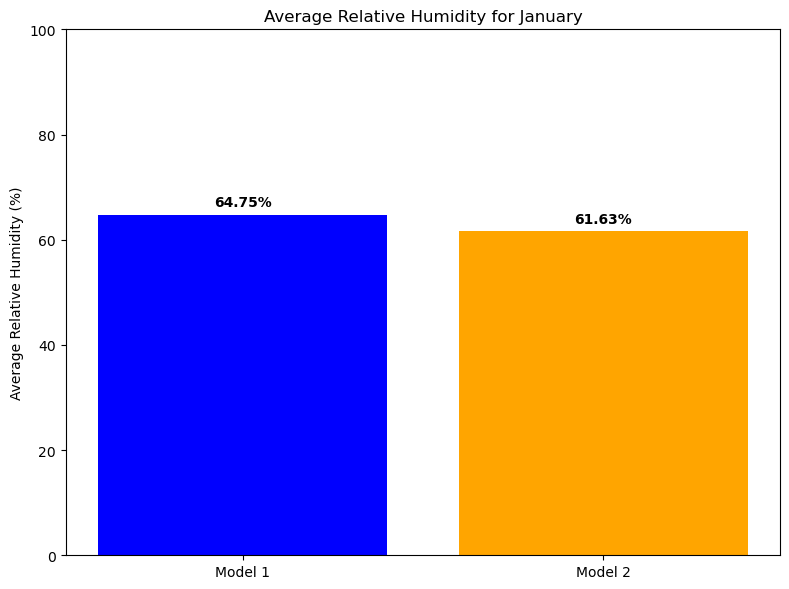

In [11]:
def extract_relative_humidity_from_epw(epw_file_path):
    """Extract relative humidity from an EPW file."""
    with open(epw_file_path, 'r') as file:
        lines = file.readlines()
    return [float(line.split(',')[8]) for line in lines[8:]]

def plot_average_humidity(rh1, rh2):
    """Plot average relative humidity for two models."""
    avg_rh_1 = sum(rh1) / len(rh1)
    avg_rh_2 = sum(rh2) / len(rh2)
    
    # Plotting
    models = ['Model 1', 'Model 2']
    avg_rhs = [avg_rh_1, avg_rh_2]
    
    plt.figure(figsize=(8, 6))
    plt.bar(models, avg_rhs, color=['blue', 'orange'])
    for i, v in enumerate(avg_rhs):
        plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', va='bottom', fontweight='bold')
    plt.ylabel('Average Relative Humidity (%)')
    plt.title('Average Relative Humidity for January')
    plt.ylim(0, 100)  # As RH varies from 0 to 100%
    plt.tight_layout()
    plt.show()

# Extracting relative humidity
model_output_jan1_rh = extract_relative_humidity_from_epw(model_output_path_jan1)
model_output_jan2_rh = extract_relative_humidity_from_epw(model_output_path_jan2)

# Plotting average relative humidity
plot_average_humidity(model_output_jan1_rh, model_output_jan2_rh)
